# statsmodels API

This notebook demonstrates how to use the statsmodels library for time series analysis and forecasting on real-time Bitcoin price data. The raw price data is ingested using the CoinGecko API, and all data preprocessing, modeling, and forecasting are performed using the statsmodels API.

The Python wrapper layer built around statsmodels includes:
- Preparing time-indexed Bitcoin price data.
- Applying ARIMA models to forecast future price trends.
- Handling model fitting, prediction, and visualization in reusable functions.

All utility functions used in this notebook are defined in statsmodels_utils.py. These functions provide a modular and maintainable interface over the base statsmodels API. For design decisions and function-level documentation, refer to statsmodels.API.md.

This notebook is intended to demonstrate the functionality of the statsmodels library via our software abstraction. For a full end-to-end application, see statsmodels.example.ipynb.

References:
- statsmodels Documentation: https://www.statsmodels.org/
- statsmodels.API.md
- CoinGecko API Documentation: https://www.coingecko.com/en/api/documentation
- Jupyter Notebook Style Guide: https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [45]:
import logging
import Statsmodels_utils as smu  # utils file
import warnings
warnings.filterwarnings("ignore")


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

## Step 1: Load 1-Day BTC Price Data

In [31]:
btc_df = smu.fetch_historical_data()
btc_df.head()

,price
timestamp,
2025-05-01 03:10:00+00:00,94917.200852
2025-05-01 03:15:00+00:00,94863.804954
2025-05-01 03:21:00+00:00,94771.749466
2025-05-01 03:26:00+00:00,94789.339632
2025-05-01 03:29:00+00:00,94811.968781


## Step 2: Simulate Real-Time Streaming (3 Minutes)

In [34]:
btc_df = smu.simulate_realtime(btc_df, minutes=3)

INFO:Statsmodels_utils:Simulating 3 minutes of real-time price updates...
INFO:Statsmodels_utils:[2025-05-02 03:08:57.366382+00:00] Appended price: $97063
INFO:Statsmodels_utils:[2025-05-02 03:09:57.455481+00:00] Appended price: $97060
INFO:Statsmodels_utils:[2025-05-02 03:10:57.633741+00:00] Appended price: $97058


## Step 3: Visualize Raw BTC Price Time Series

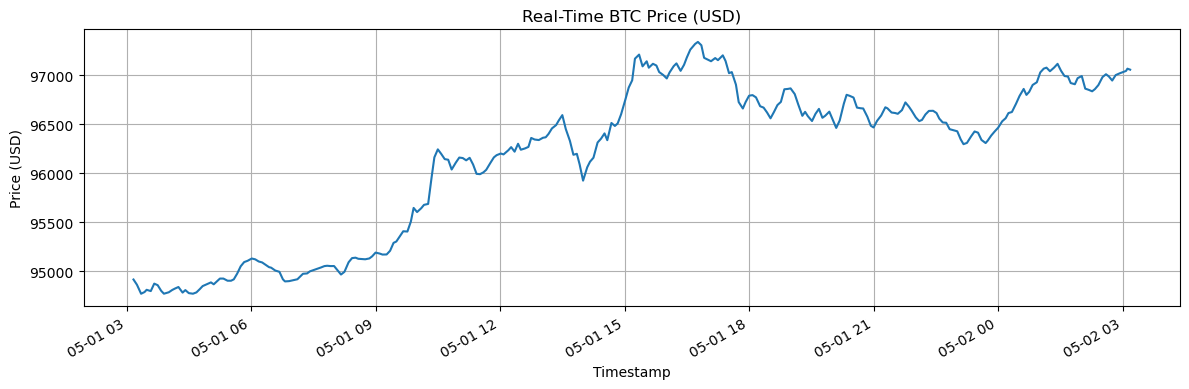

In [36]:
smu.plot_time_series(btc_df)

## Step 4: Plot ACF and PACF

<Figure size 1000x400 with 0 Axes>

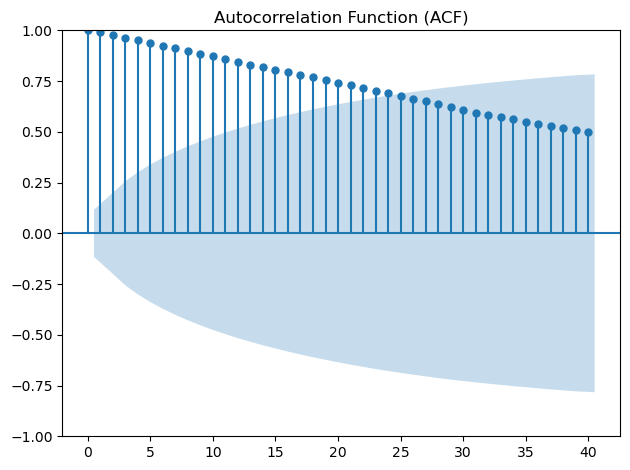

<Figure size 1000x400 with 0 Axes>

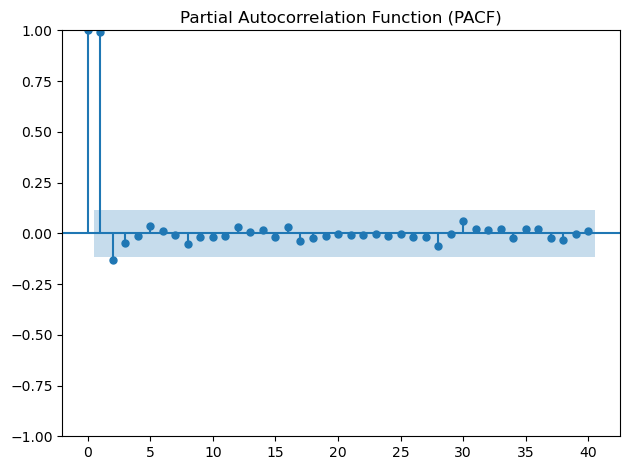

In [38]:
smu.plot_acf_pacf(btc_df)

## Step 5: Fit ARIMA Model and Forecast 30 Steps

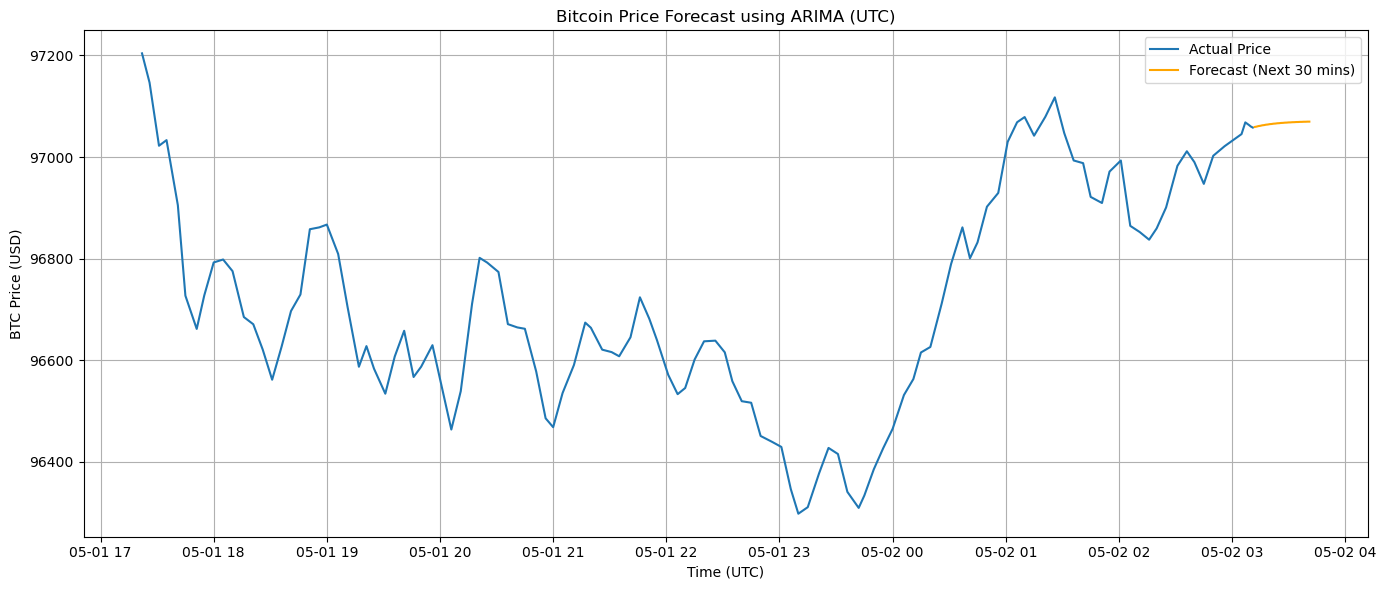

In [47]:
model_results, forecast = smu.run_arima_analysis(btc_df)
smu.plot_forecast(btc_df, forecast)